In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model
import xgboost as xgb

In [2]:
df = pd.read_csv("retail_store_inventory.csv")
df["Date"] = pd.to_datetime(df["Date"], errors='coerce') #handle datatype 

In [3]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [4]:
# Each store id 
store1=df[df["Store ID"]=="S001"]
store2=df[df["Store ID"]=="S002"]
store3=df[df["Store ID"]=="S003"]
store4=df[df["Store ID"]=="S004"]
store5=df[df["Store ID"]=="S005"]

data=store1 # 1. store 

In [5]:
data['year'] = pd.to_datetime(data['Date']).dt.year
data['month'] = pd.to_datetime(data['Date']).dt.month
data['day'] = pd.to_datetime(data['Date']).dt.day
data['day_of_year'] = pd.to_datetime(data['Date']).dt.dayofyear
data['week_of_year'] = pd.to_datetime(data['Date']).dt.isocalendar().week
data['quarter'] = pd.to_datetime(data['Date']).dt.quarter
data['season'] = (data['month'] % 12 // 3 + 1)
data

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1424938003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['Date']).dt.year
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1424938003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['Date']).dt.month
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1424938003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73015 2024-01-01     S001      P0016  Electronics   East               74   
73016 2024-01-01     S001      P0017         Toys   East              282   
73017 2024-01-01     S001      P0018  Electronics   East              191   
73018 2024-01-01     S001      P0019     Clothing   West              149   
73019 2024-01-01     S001      P0020  Electronics  South              242   

       Units Sold  Units Ordered  Demand Forecast  Price  ...  \
0             127             55           135.47  33.50  ...   
1             150             66           144.04  63.01  ...   
2              65             51            74.02  27.99  ...   
3              61            164            62.18  32.72  ...   
4              14            135             9.26  73.64  ...   
...           ...            ...              ...    ...  ...   
73015          13            189            27.53  40.61  ...   
73016         186             61           201.40  20.68  ...   
73017          29             95            25.01  24.10  ...   
73018         145             85           154.83  81.71  ...   
73019          52            198            50.82  11.00  ...   

       Holiday/Promotion Competitor Pricing  Seasonality  year month  day  \
0                      0              29.69       Autumn  2022     1    1   
1                      0              66.16       Autumn  2022     1    1   
2                      1              31.32       Summer  2022     1    1   
3                      1              34.74       Autumn  2022     1    1   
4                      0              68.95       Summer  2022     1    1   
...                  ...                ...          ...   ...   ...  ...   
73015                  1              35.76       Summer  2024     1    1   
73016                  0              17.23       Winter  2024     1    1   
73017                  1              23.13       Winter  2024     1    1   
73018                  0              80.86       Spring  2024     1    1   
73019                  0               7.46       Spring  2024     1    1   

       day_of_year  week_of_year  quarter  season  
0                1            52        1       1  
1                1            52        1       1  
2                1            52        1       1  
3                1            52        1       1  
4                1            52        1       1  
...            ...           ...      ...     ...  
73015            1             1        1       1  
73016            1             1        1       1  
73017            1             1        1       1  
73018            1             1        1       1  
73019            1             1        1       1  

[14620 rows x 22 columns]

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1076399893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_sin'] = np.sin(2*np.pi*data.month/12)  # Encoding month
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1076399893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_cos'] = np.cos(2*np.pi*data.month/12)
/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1076399893.py:5: SettingWithCopyWarning: 
A value is trying to be set on 

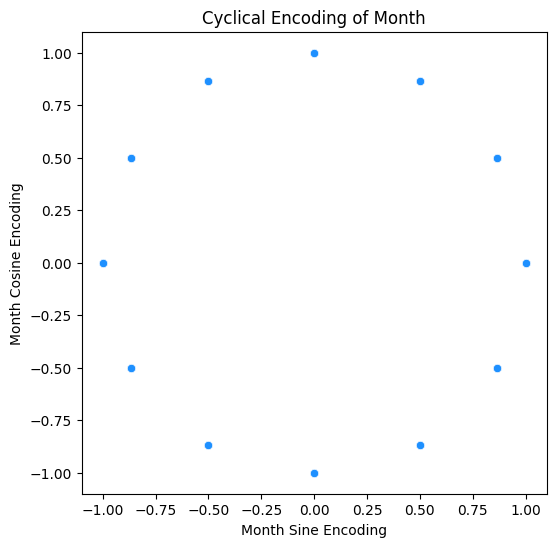

In [6]:
days_in_month = 30
data['month_sin'] = np.sin(2*np.pi*data.month/12)  # Encoding month
data['month_cos'] = np.cos(2*np.pi*data.month/12)

data['day_sin'] = np.sin(2*np.pi*data.day/days_in_month)
data['day_cos'] = np.cos(2*np.pi*data.day/days_in_month)

days_in_year = 365
data['day_of_year_sin'] = np.sin(2*np.pi*data.day_of_year/days_in_year)
data['day_of_year_cos'] = np.cos(2*np.pi*data.day_of_year/days_in_year)

weeks_in_year = 52.1429
data['week_of_year_sin'] = np.sin(2*np.pi*data.week_of_year/weeks_in_year)
data['week_of_year_cos'] = np.cos(2*np.pi*data.week_of_year/weeks_in_year)

quarters_in_year = 4
data['quarter_sin'] = np.sin(2*np.pi*data.quarter/quarters_in_year)
data['quarter_cos'] = np.cos(2*np.pi*data.quarter/quarters_in_year)

seasons_in_year = 4
data['season_sin'] = np.sin(2*np.pi*data.season/seasons_in_year)
data['season_cos'] = np.cos(2*np.pi*data.season/seasons_in_year)

# Plotting the scatter plot for the month feature encoding
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.scatterplot(x=data.month_sin, y=data.month_cos, color='dodgerblue')

# Display the plot
plt.title("Cyclical Encoding of Month")
plt.xlabel("Month Sine Encoding")
plt.ylabel("Month Cosine Encoding")
plt.show()

In [7]:
dataframe=data.copy() #copy dataframe for using different tasks

In [8]:
st = data.groupby(["Store ID", 'Product ID']).size() # total number of of each product
st

Store ID  Product ID
S001      P0001         731
          P0002         731
          P0003         731
          P0004         731
          P0005         731
          P0006         731
          P0007         731
          P0008         731
          P0009         731
          P0010         731
          P0011         731
          P0012         731
          P0013         731
          P0014         731
          P0015         731
          P0016         731
          P0017         731
          P0018         731
          P0019         731
          P0020         731
dtype: int64

In [9]:
split_date = "2023-06-06"
train = data.loc[data.Date <= split_date].copy()
test = data.loc[data.Date > split_date].copy()

In [10]:
len(train)

10440

In [11]:
len(test)

4180

In [12]:
train_float=train.select_dtypes(include="float64") #float64 columns
test_float=test.select_dtypes(include="float64") 

In [13]:
X_train,y_train=train_float,train["Units Sold"]  #X_train columns are selected for train model
X_test,y_test=test_float,test["Units Sold"]

In [14]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose=True) # Change verbose to True if you want to see it train

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

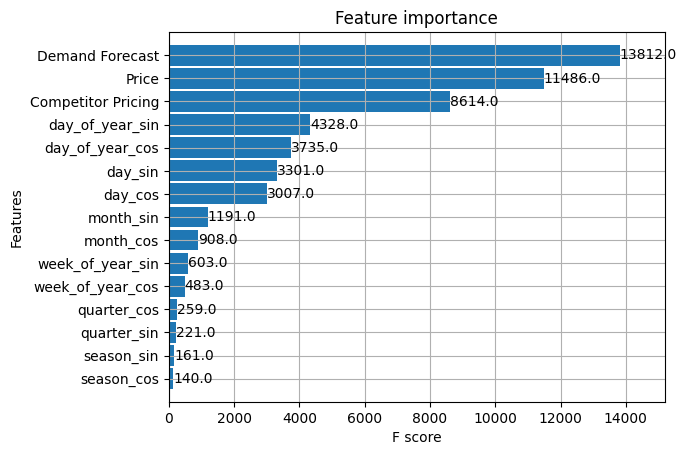

In [15]:
xgb.plot_importance(reg, height=0.9)

In [16]:
test["predicted_unit"]=reg.predict(X_test)

data_all=pd.concat([train,test],sort=False)
data_all

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73015 2024-01-01     S001      P0016  Electronics   East               74   
73016 2024-01-01     S001      P0017         Toys   East              282   
73017 2024-01-01     S001      P0018  Electronics   East              191   
73018 2024-01-01     S001      P0019     Clothing   West              149   
73019 2024-01-01     S001      P0020  Electronics  South              242   

       Units Sold  Units Ordered  Demand Forecast  Price  ...   day_cos  \
0             127             55           135.47  33.50  ...  0.978148   
1             150             66           144.04  63.01  ...  0.978148   
2              65             51            74.02  27.99  ...  0.978148   
3              61            164            62.18  32.72  ...  0.978148   
4              14            135             9.26  73.64  ...  0.978148   
...           ...            ...              ...    ...  ...       ...   
73015          13            189            27.53  40.61  ...  0.978148   
73016         186             61           201.40  20.68  ...  0.978148   
73017          29             95            25.01  24.10  ...  0.978148   
73018         145             85           154.83  81.71  ...  0.978148   
73019          52            198            50.82  11.00  ...  0.978148   

      day_of_year_sin  day_of_year_cos  week_of_year_sin week_of_year_cos  \
0            0.017213         0.999852         -0.017219         0.999852   
1            0.017213         0.999852         -0.017219         0.999852   
2            0.017213         0.999852         -0.017219         0.999852   
3            0.017213         0.999852         -0.017219         0.999852   
4            0.017213         0.999852         -0.017219         0.999852   
...               ...              ...               ...              ...   
73015        0.017213         0.999852          0.120208         0.992749   
73016        0.017213         0.999852          0.120208         0.992749   
73017        0.017213         0.999852          0.120208         0.992749   
73018        0.017213         0.999852          0.120208         0.992749   
73019        0.017213         0.999852          0.120208         0.992749   

       quarter_sin   quarter_cos  season_sin    season_cos  predicted_unit  
0              1.0  6.123234e-17         1.0  6.123234e-17             NaN  
1              1.0  6.123234e-17         1.0  6.123234e-17             NaN  
2              1.0  6.123234e-17         1.0  6.123234e-17             NaN  
3              1.0  6.123234e-17         1.0  6.123234e-17             NaN  
4              1.0  6.123234e-17         1.0  6.123234e-17             NaN  
...            ...           ...         ...           ...             ...  
73015          1.0  6.123234e-17         1.0  6.123234e-17       12.828602  
73016          1.0  6.123234e-17         1.0  6.123234e-17      191.562729  
73017          1.0  6.123234e-17         1.0  6.123234e-17       21.666367  
73018          1.0  6.123234e-17         1.0  6.123234e-17      146.384094  
73019          1.0  6.123234e-17         1.0  6.123234e-17       46.065754  

[14620 rows x 35 columns]

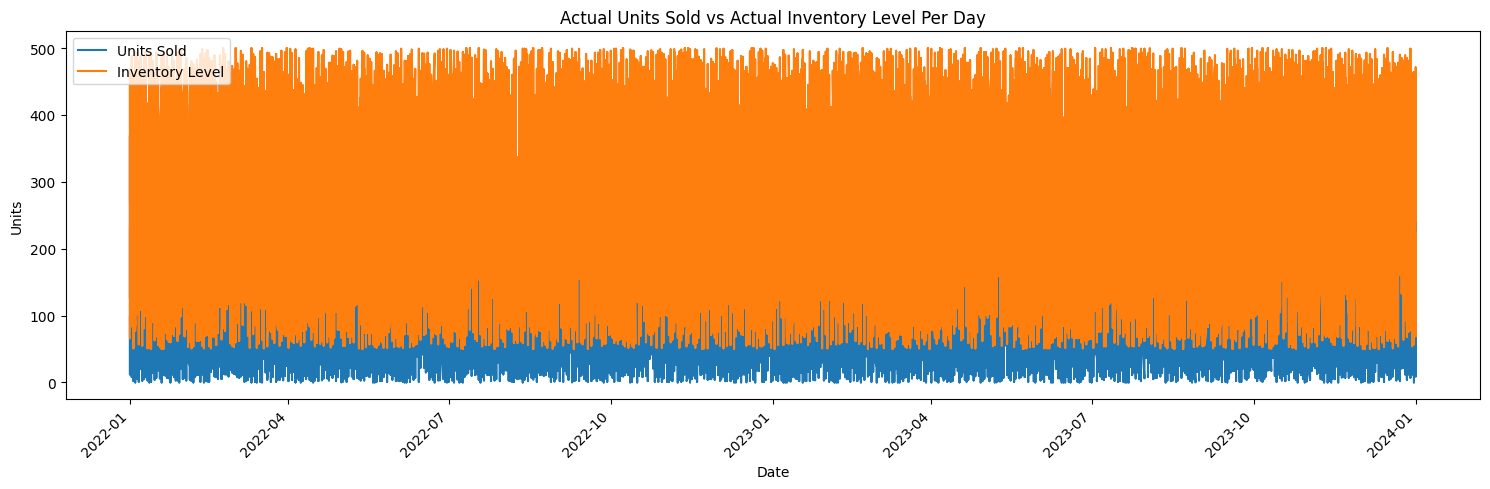

In [36]:
data_all.set_index('Date')[["Units Sold","Inventory Level"]].plot(figsize=(15,5), title='Actual Units Sold vs Actual Inventory Level Per Day')
plt.xlabel('Date')
plt.ylabel('Units')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

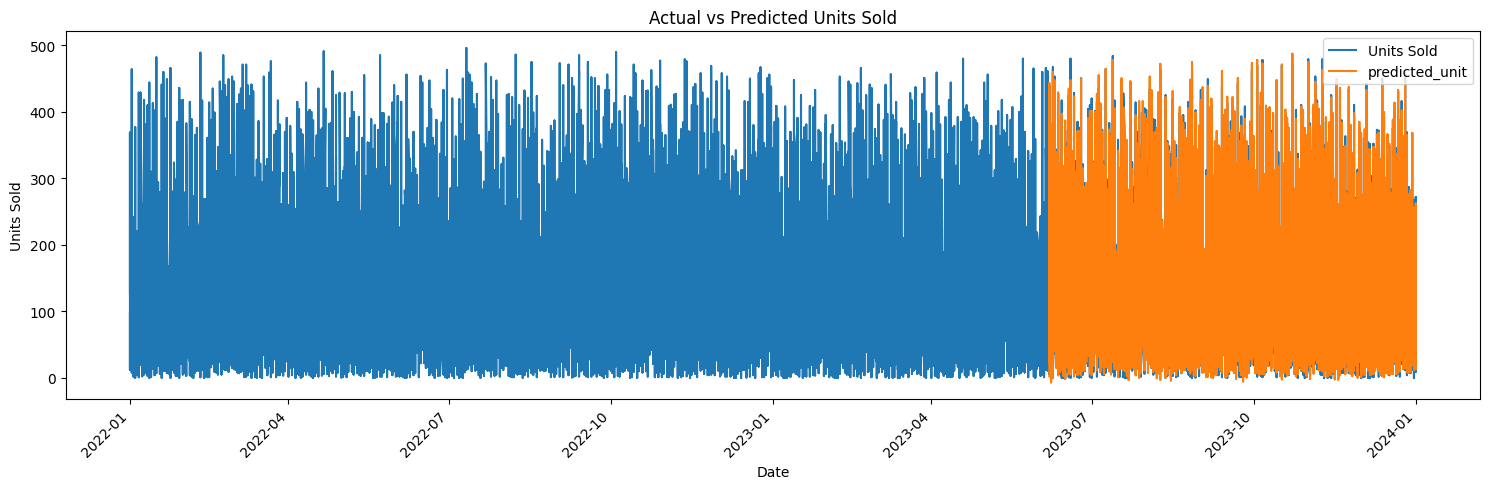

In [17]:
data_all.set_index('Date')[["Units Sold","predicted_unit"]].plot(figsize=(15,5), title='Actual vs Predicted Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
mae = mean_absolute_error(test['Units Sold'], test['predicted_unit'])
rmse = np.sqrt(mean_squared_error(test['Units Sold'], test['predicted_unit']))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 8.303871111650215
Root Mean Squared Error: 10.018814932940813


In [61]:
check = data_all[["Date","Store ID","Product ID","Units Sold","predicted_unit", "Inventory Level"]]

In [62]:
check_pro1 = check[check['Product ID']=="P0001"]

In [63]:
check_pro1.groupby(['Date']).sum().tail(10)

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/1193753093.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  check_pro1.groupby(['Date']).sum().tail(10)


Units Sold  predicted_unit  Inventory Level
Date                                                   
2023-12-23         188      196.907669              452
2023-12-24         342      341.225830              455
2023-12-25          86       89.133507              109
2023-12-26          46       60.320385              372
2023-12-27         196      189.288864              256
2023-12-28          67       74.384621              104
2023-12-29         168      187.757416              224
2023-12-30          30       24.790009              208
2023-12-31          26       27.146847              135
2024-01-01          40       48.732719              223

In [20]:
def plot_each_product_demand(df,product):
    dataf=df[df["Product ID"]==product]
    
    #split data
    
    split_date = "2023-06-06"
    train = dataf.loc[dataf.Date <= split_date]
    test = dataf.loc[dataf.Date > split_date]
   
    # select float 64 column for model
    
    train_float=train.select_dtypes(include=["float64","int32","int64"]) #float64 columns
    test_float=test.select_dtypes(include=["float64","int32","int64"]) 
    X_train,y_train=train_float.drop(columns=["Units Sold"],axis=1),train["Units Sold"]  #X_train columns are selected for train model
    X_test,y_test=test_float.drop(columns=["Units Sold"],axis=1),test["Units Sold"]
    
    #xgboost model training
    
    reg = xgb.XGBRegressor(n_estimators=1000)
    reg.fit(X_train, y_train,
       verbose=False)# Change verbose to True if you want to see it train
    
    #predicting
    
    test["predicted_sold"]=reg.predict(X_test)
   
    data_product=pd.concat([train,test],sort=False)
    
    #visualizing
    
    data_product.set_index('Date')[["Units Sold", "predicted_sold"]].plot(figsize=(15,5), title=f"Actual vs Predicted Units Sold  for {product}")
    plt.xlabel('Date')
    plt.ylabel(f'Inventory Level for {product}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    #mae 
    
    mae_current=mean_absolute_error(test['predicted_sold'], test['Units Sold'])
    print()
    print(f"Mean Squared Error for  {product}={mae_current}")
    print()
    return data_product

In [21]:
dataframe.select_dtypes(include=["float64"]).columns #return the column names  whose datatype is float64  
dataframe.dtypes

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
year                           int64
month                          int64
day                            int64
day_of_year                    int64
week_of_year                  UInt32
quarter                        int64
season                         int64
month_sin                    float64
month_cos                    float64
day_sin                      float64
day_cos                      float64
day_of_year_sin              float64
d

In [22]:
def unique_values(df,column_id):
    array=df[column_id].unique()
    list=sorted(array.tolist())
    return list

In [23]:
list_product=unique_values(data,"Product ID")

/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


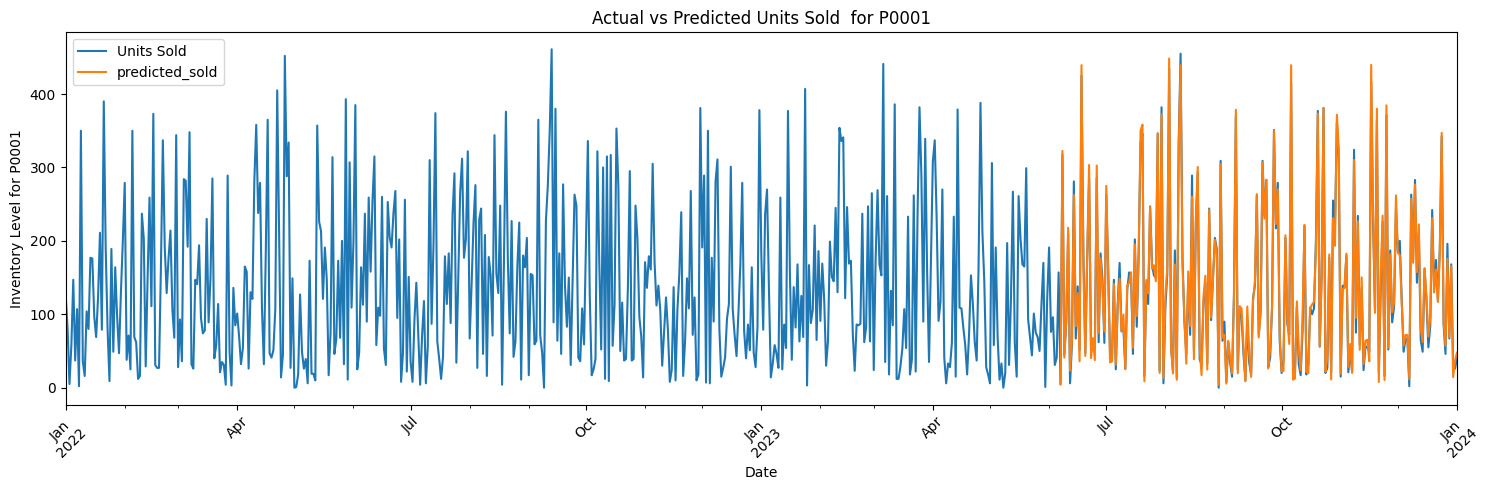


Mean Squared Error for  P0001=8.748227856375955



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


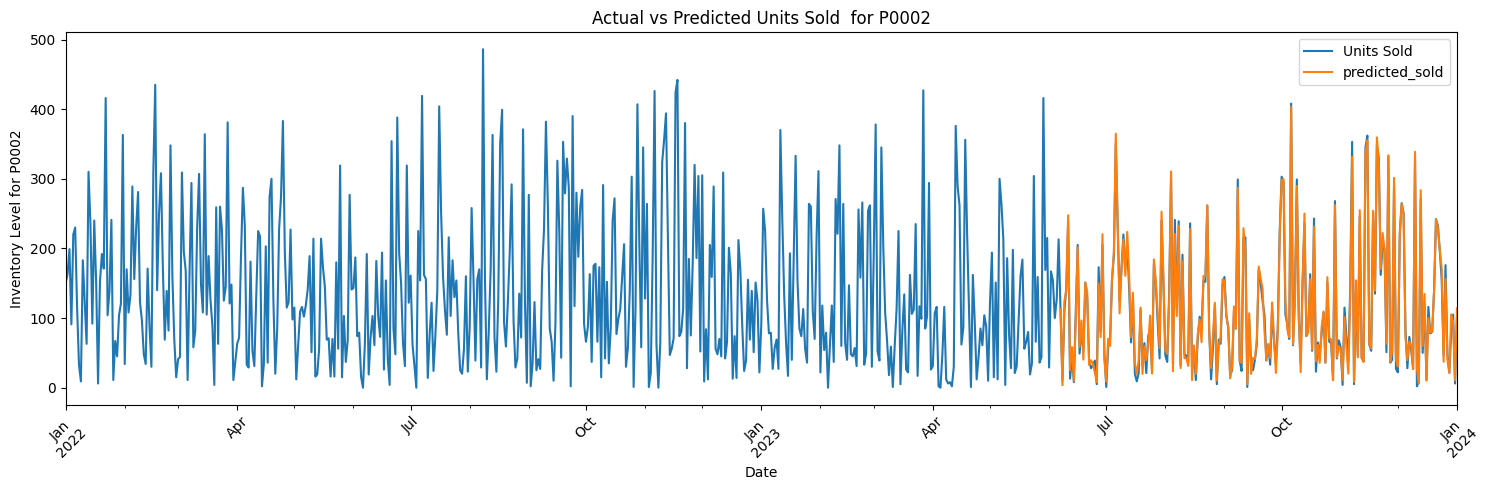


Mean Squared Error for  P0002=8.444037042736436



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


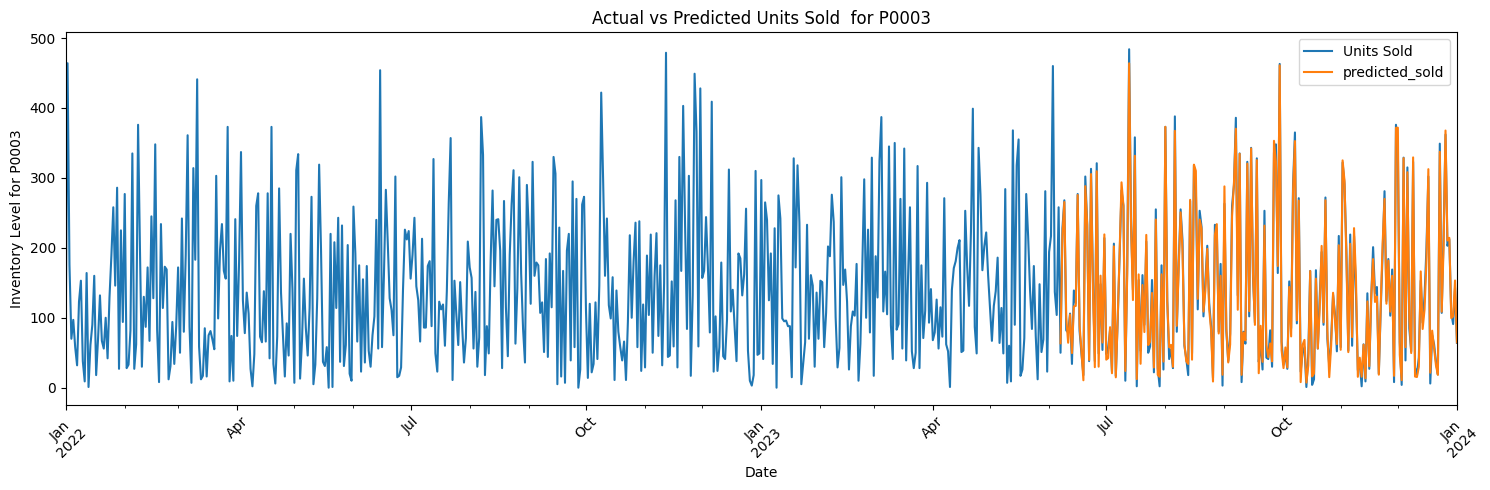


Mean Squared Error for  P0003=9.452782368545897



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


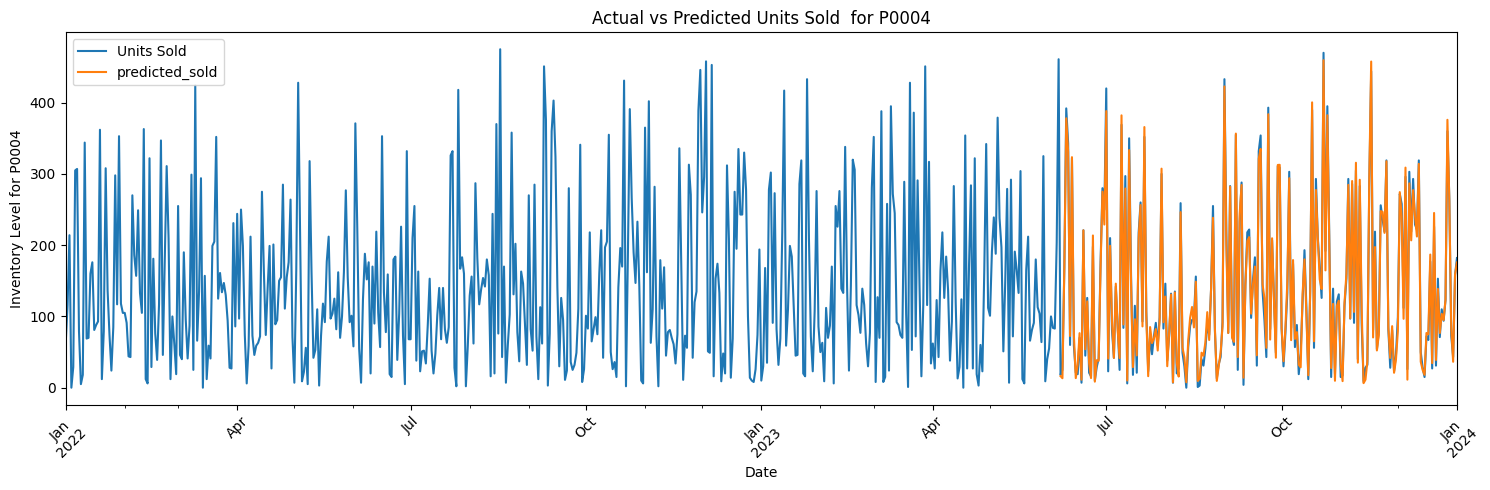


Mean Squared Error for  P0004=9.382340565822911



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


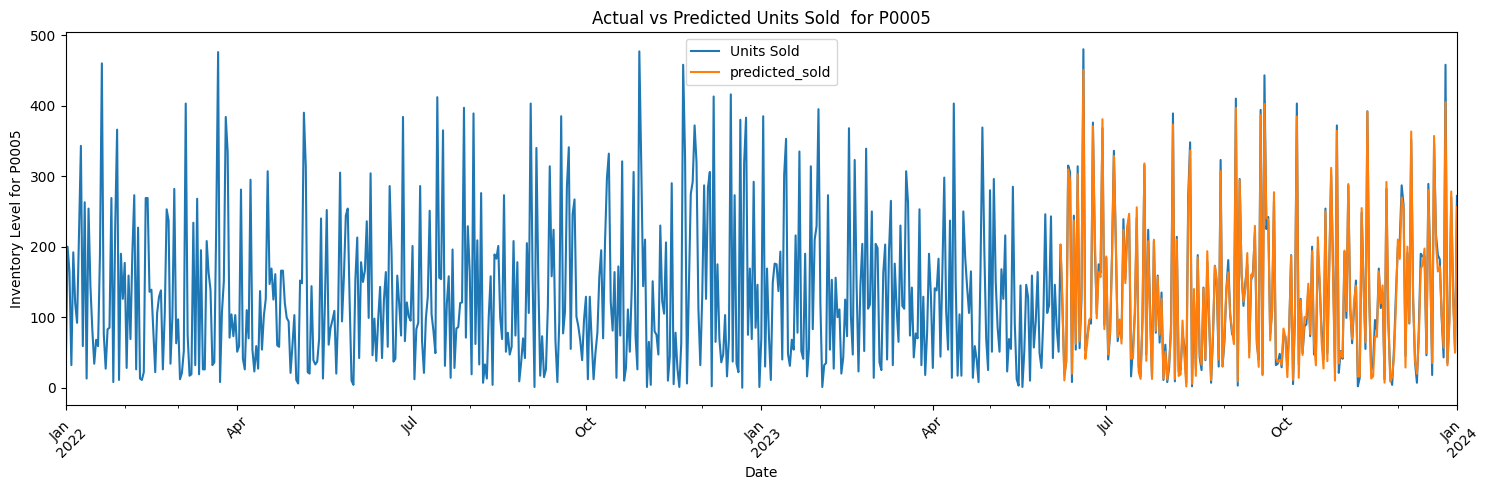


Mean Squared Error for  P0005=8.975520203558451



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


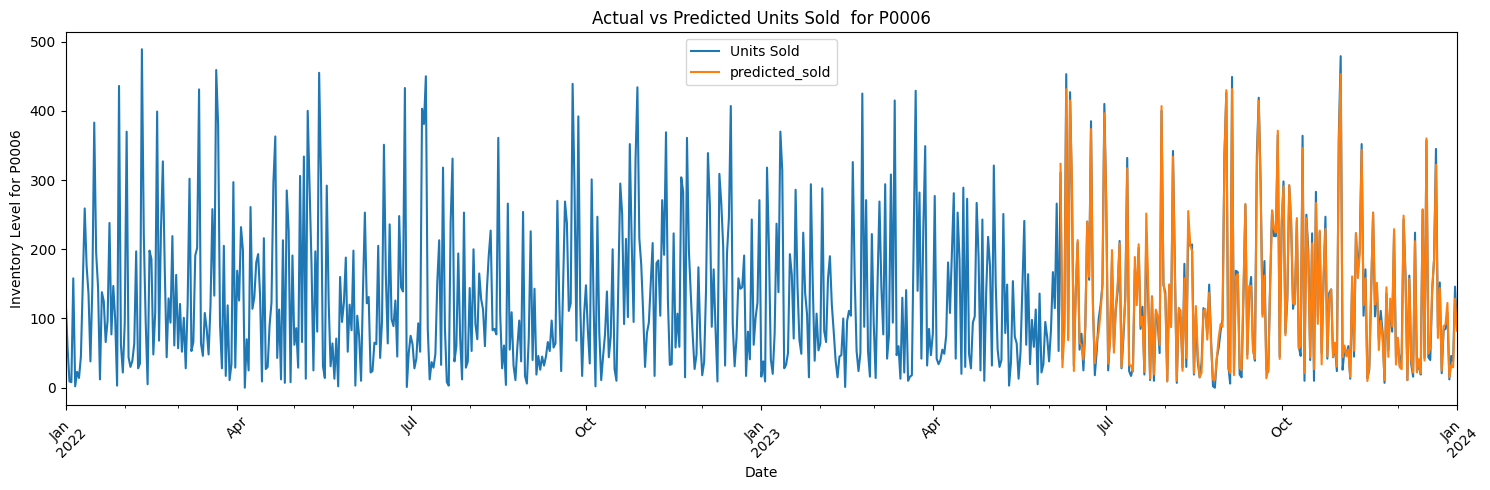


Mean Squared Error for  P0006=8.59100283390027



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


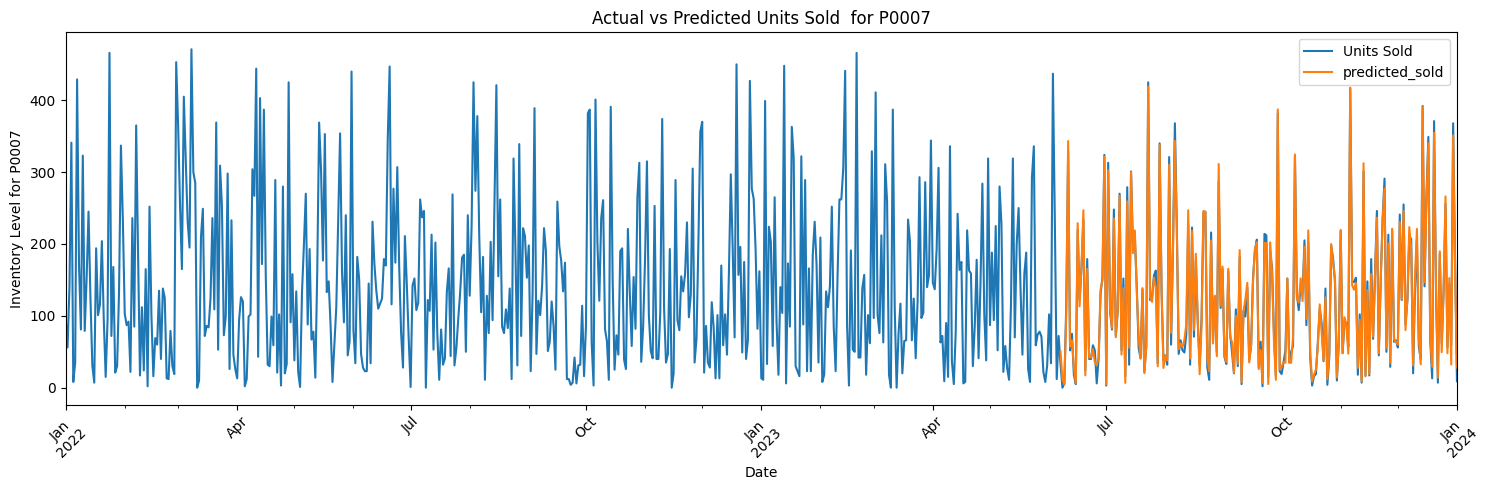


Mean Squared Error for  P0007=7.714873400601474



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


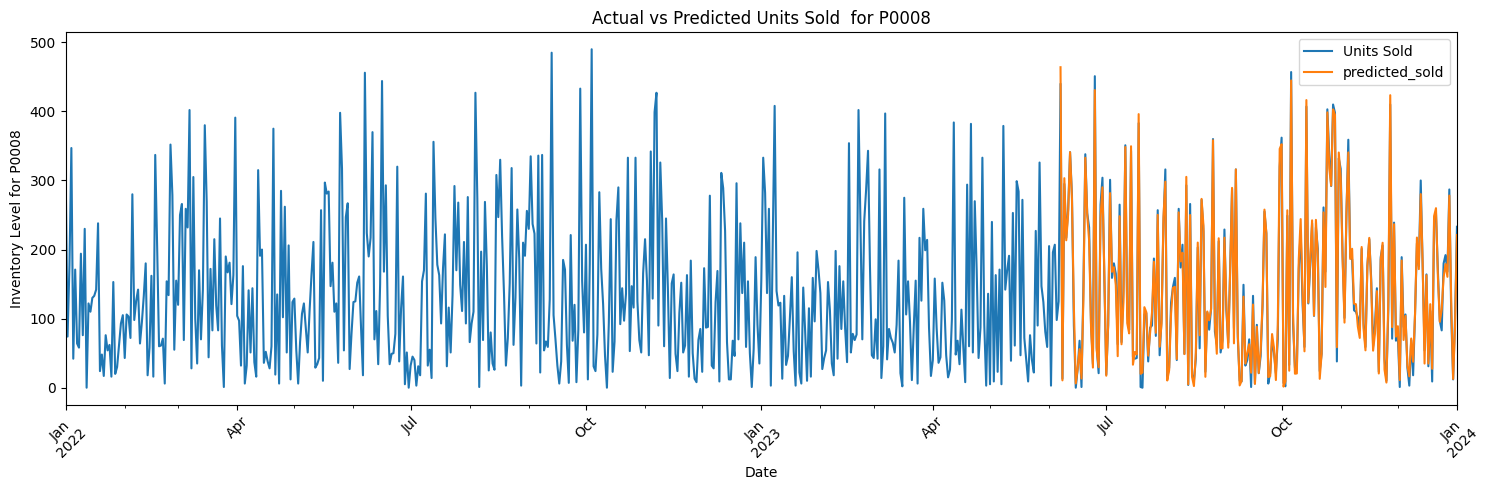


Mean Squared Error for  P0008=9.019808971140373



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


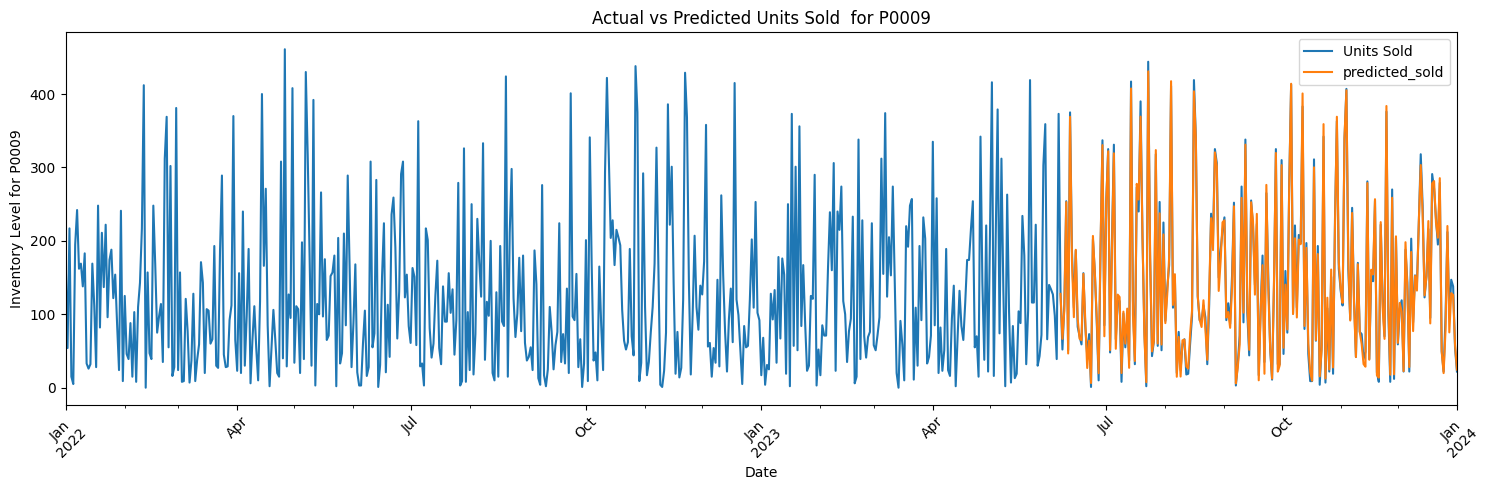


Mean Squared Error for  P0009=7.900616757607346



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


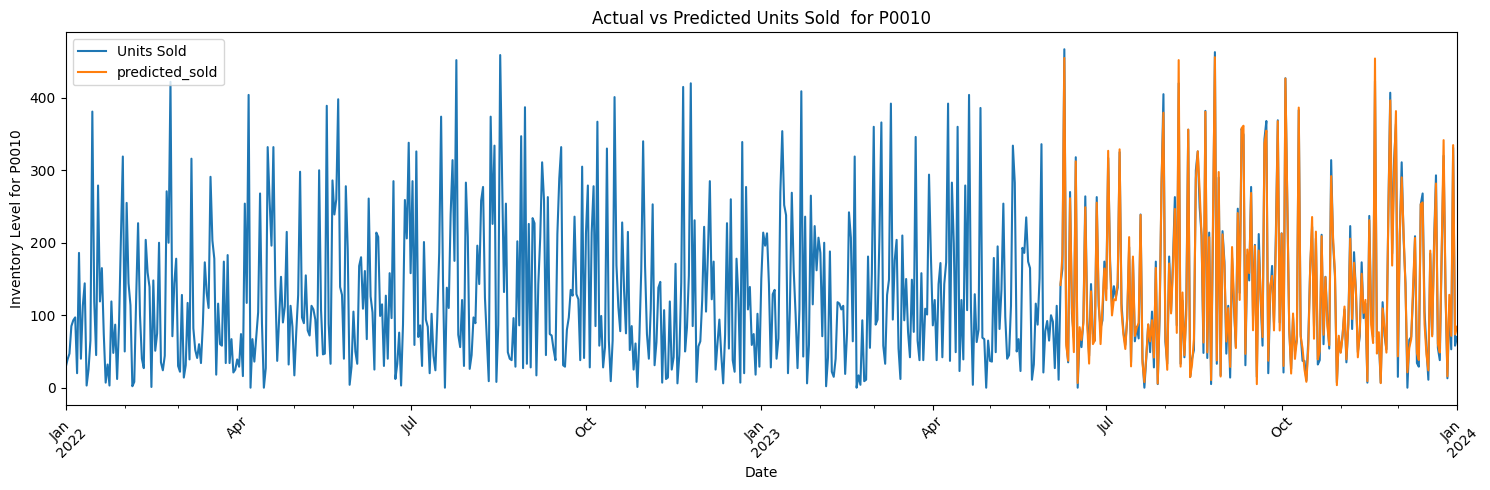


Mean Squared Error for  P0010=9.126222212348829



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


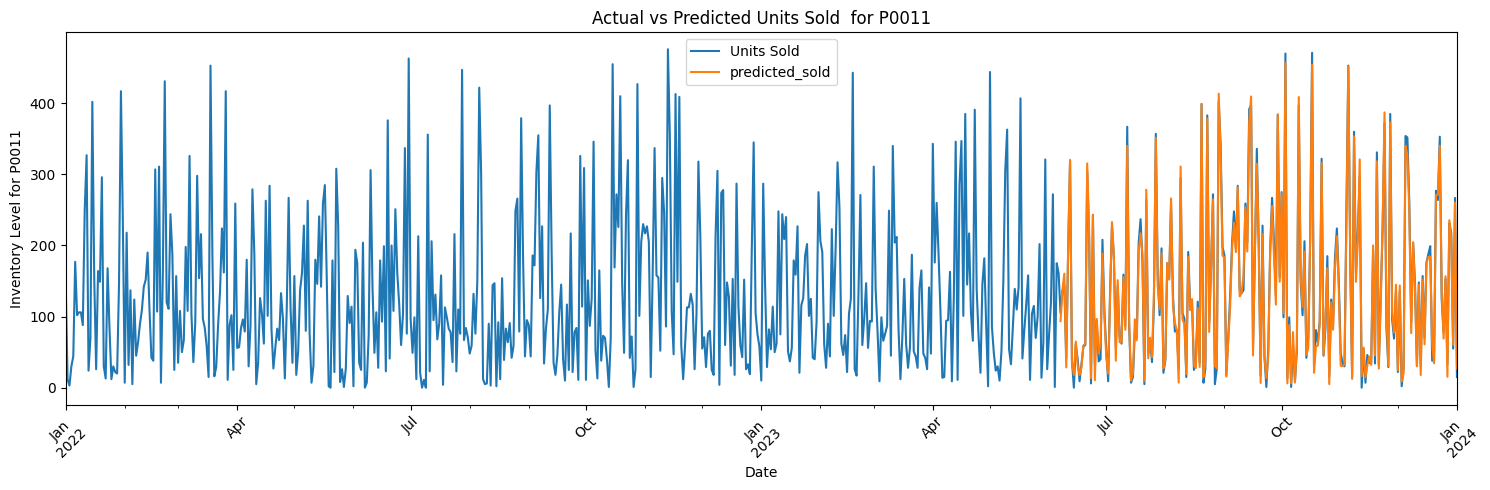


Mean Squared Error for  P0011=9.02327371213995



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


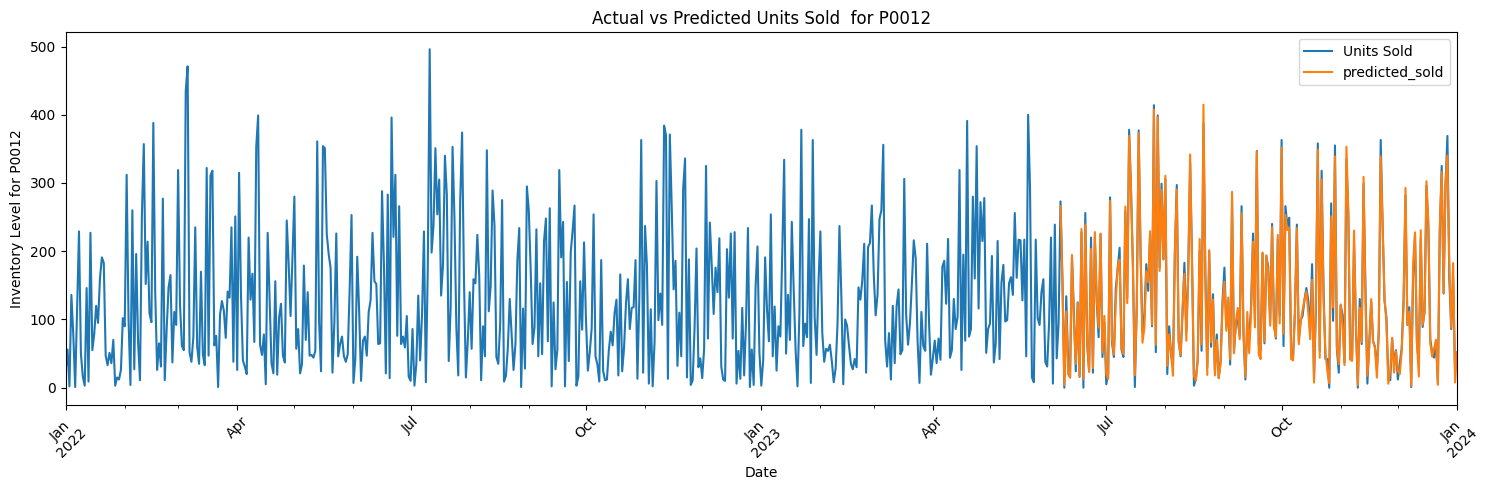


Mean Squared Error for  P0012=8.54236629362882



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


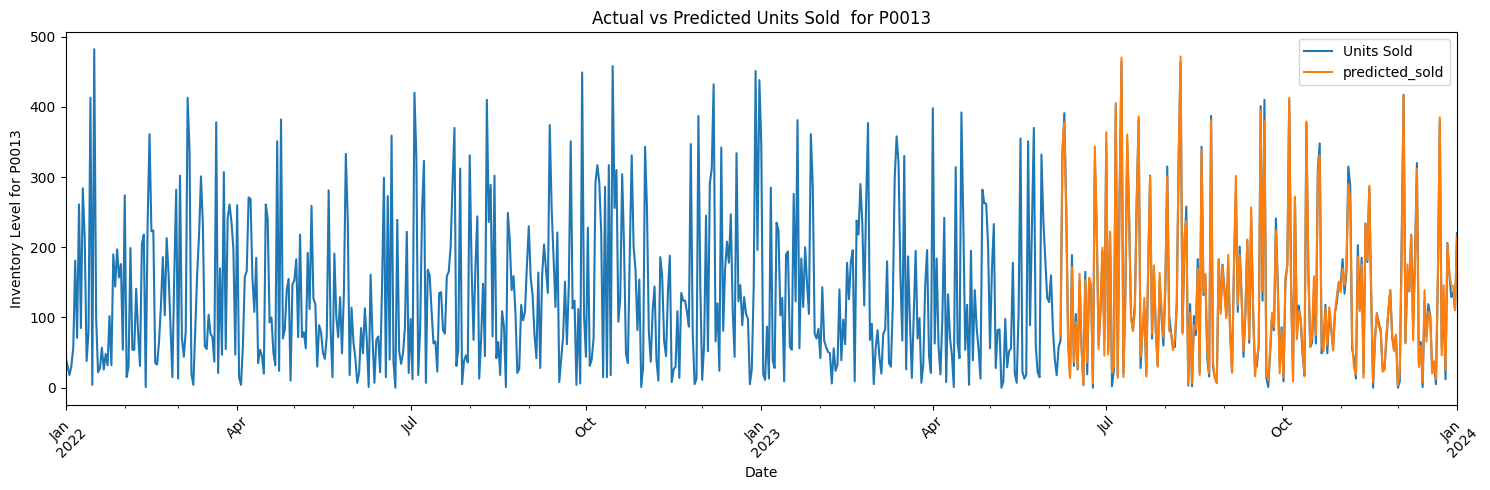


Mean Squared Error for  P0013=7.799425102306896



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


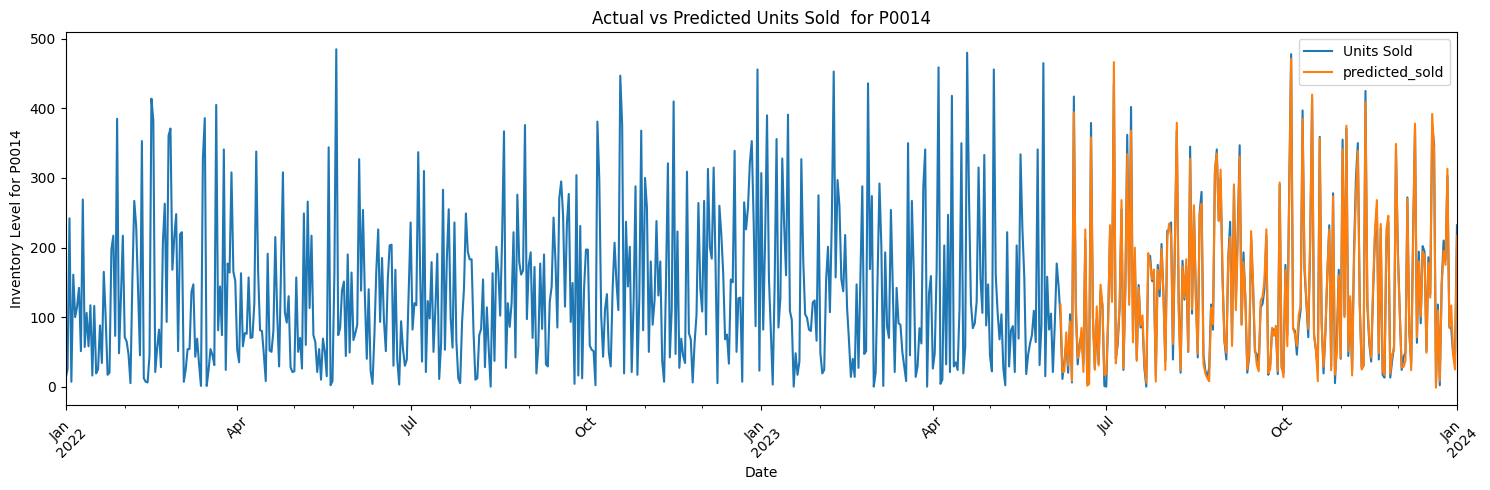


Mean Squared Error for  P0014=9.033895772609984



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


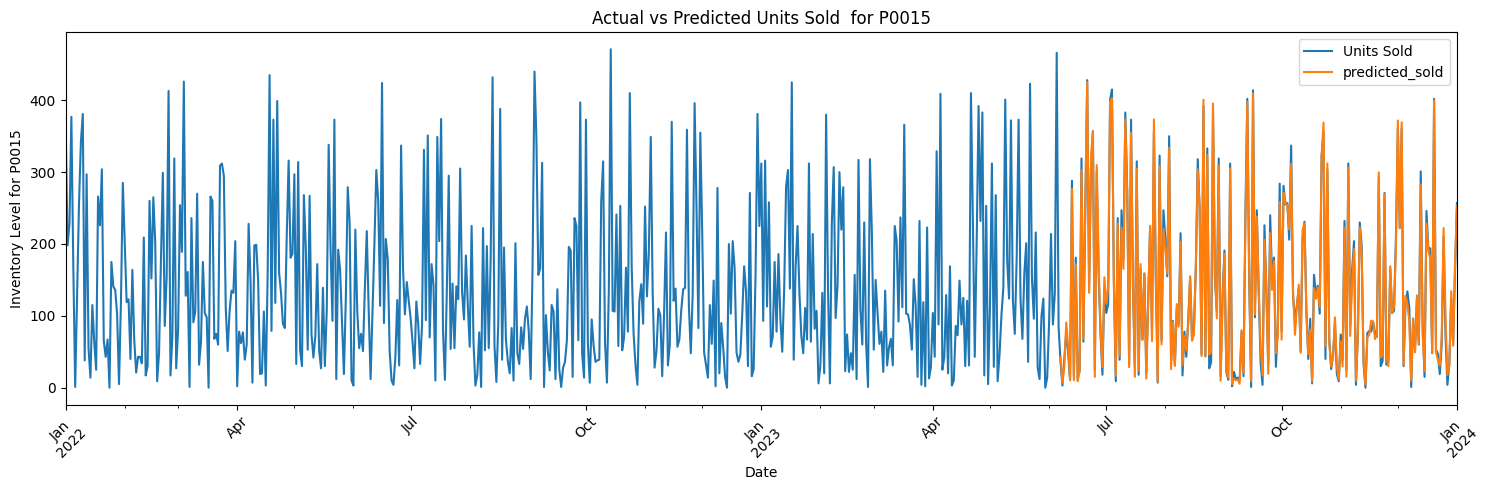


Mean Squared Error for  P0015=8.612573997826097



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


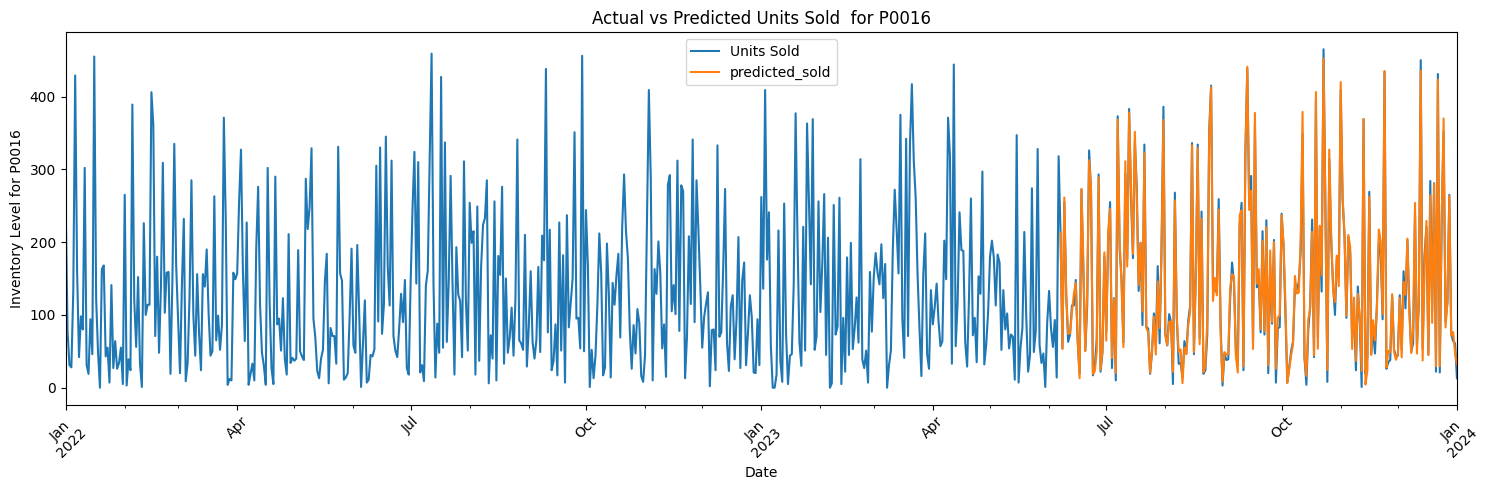


Mean Squared Error for  P0016=9.079465555802487



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


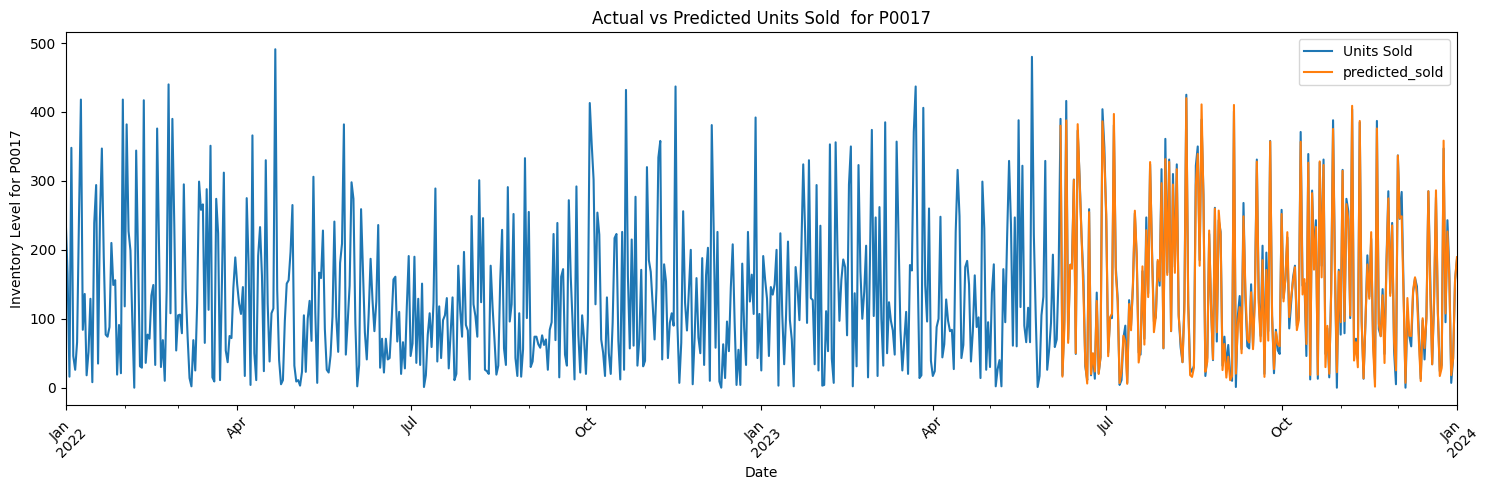


Mean Squared Error for  P0017=8.565756863384156



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


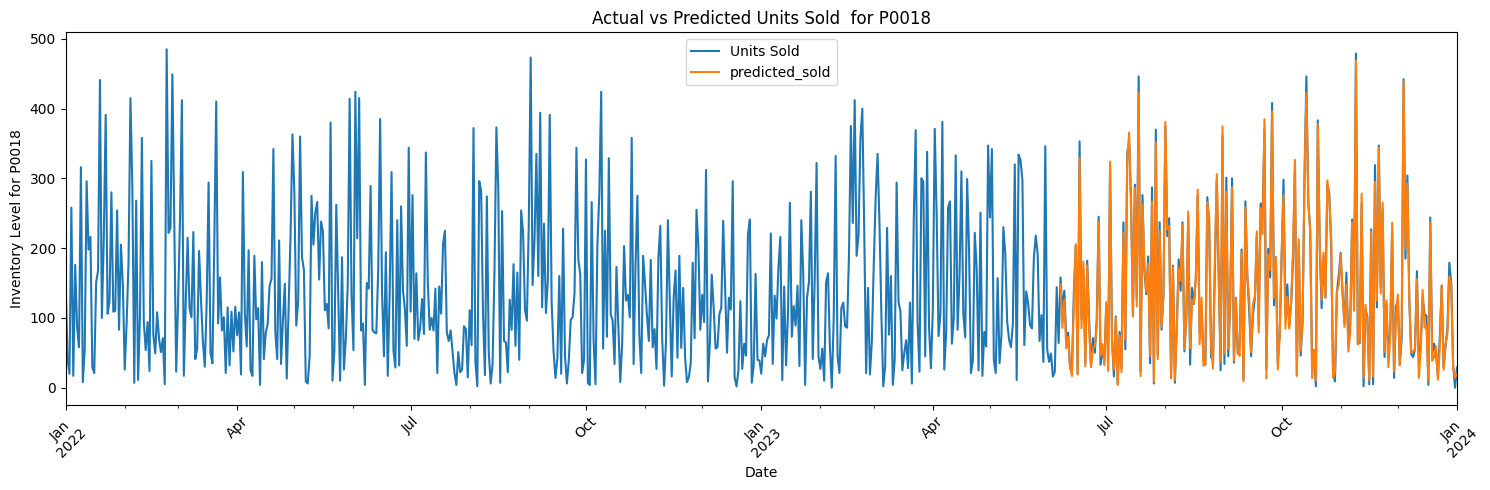


Mean Squared Error for  P0018=9.185639692835831



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


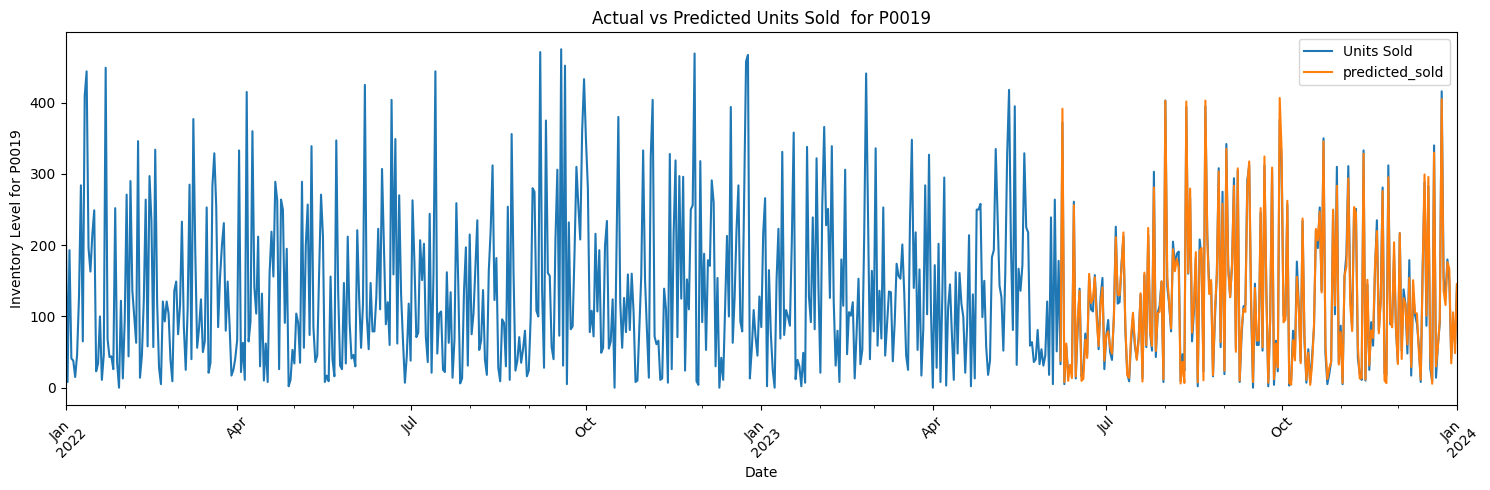


Mean Squared Error for  P0019=7.9399186230162115



/var/folders/_z/0s1nj30n17q95bnhv10ll0500000gn/T/ipykernel_20080/2769666893.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_sold"]=reg.predict(X_test)


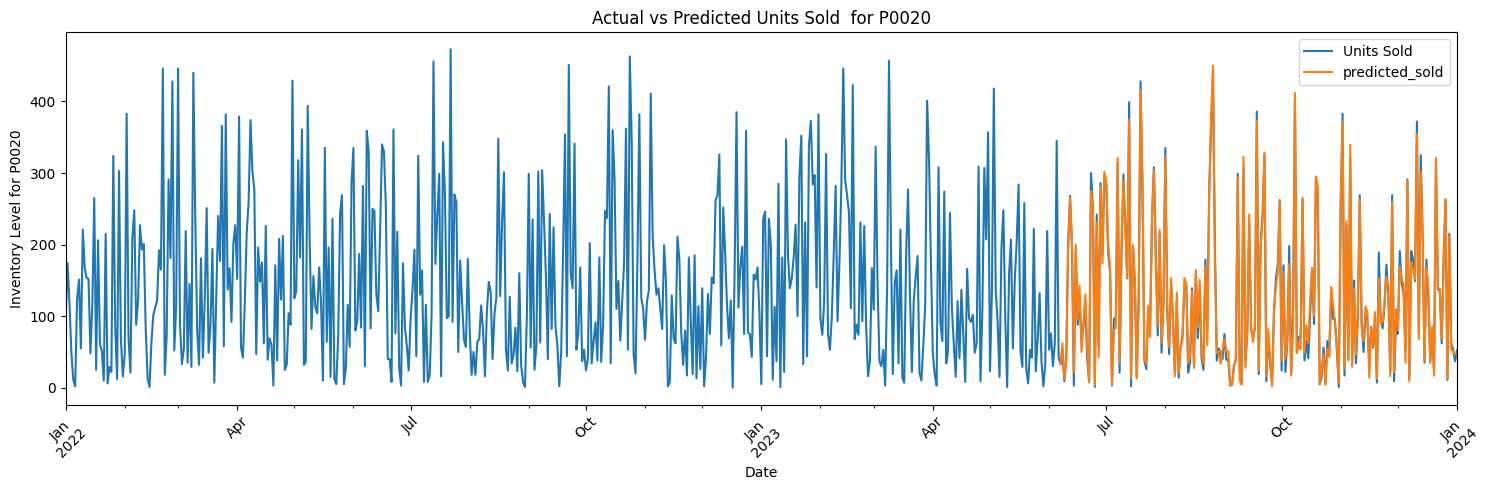


Mean Squared Error for  P0020=8.990127339887847



In [24]:
for x in list_product:
    plot_each_product_demand(dataframe,x)

In [25]:
# Step 1: Prepare the Data for Forecasting
last_date = data['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Create a DataFrame for future dates
future_data = pd.DataFrame({'Date': future_dates})

# Generate cyclical features for the future dates
future_data['year'] = future_data['Date'].dt.year
future_data['month'] = future_data['Date'].dt.month
future_data['day'] = future_data['Date'].dt.day
future_data['day_of_year'] = future_data['Date'].dt.dayofyear
future_data['week_of_year'] = future_data['Date'].dt.isocalendar().week
future_data['quarter'] = future_data['Date'].dt.quarter
future_data['season'] = (future_data['month'] % 12 // 3 + 1)

# Cyclical encoding
days_in_month = 30
future_data['month_sin'] = np.sin(2 * np.pi * future_data['month'] / 12)
future_data['month_cos'] = np.cos(2 * np.pi * future_data['month'] / 12)

future_data['day_sin'] = np.sin(2 * np.pi * future_data['day'] / days_in_month)
future_data['day_cos'] = np.cos(2 * np.pi * future_data['day'] / days_in_month)

days_in_year = 365
future_data['day_of_year_sin'] = np.sin(2 * np.pi * future_data['day_of_year'] / days_in_year)
future_data['day_of_year_cos'] = np.cos(2 * np.pi * future_data['day_of_year'] / days_in_year)

weeks_in_year = 52.1429
future_data['week_of_year_sin'] = np.sin(2 * np.pi * future_data['week_of_year'] / weeks_in_year)
future_data['week_of_year_cos'] = np.cos(2 * np.pi * future_data['week_of_year'] / weeks_in_year)

quarters_in_year = 4
future_data['quarter_sin'] = np.sin(2 * np.pi * future_data['quarter'] / quarters_in_year)
future_data['quarter_cos'] = np.cos(2 * np.pi * future_data['quarter'] / quarters_in_year)

seasons_in_year = 4
future_data['season_sin'] = np.sin(2 * np.pi * future_data['season'] / seasons_in_year)
future_data['season_cos'] = np.cos(2 * np.pi * future_data['season'] / seasons_in_year)

# Step 2: Add additional features that were used in training
# Assuming you have these features in your original data
# You need to define how to get these values for the future dates
# For example, you might want to use the last known values or some forecasted values
last_known_price = data['Price'].iloc[-1]  # Replace with your logic
last_known_demand_forecast = data['Demand Forecast'].iloc[-1]  # Replace with your logic
last_known_competitor_pricing = data['Competitor Pricing'].iloc[-1]  # Replace with your logic

# Add these features to the future DataFrame
future_data['Price'] = last_known_price
future_data['Demand Forecast'] = last_known_demand_forecast
future_data['Competitor Pricing'] = last_known_competitor_pricing

In [26]:
# Step 3: Make Predictions
# Select the same features used for training
X_future=future_data.select_dtypes(include="float64") 

In [27]:
future = X_future[['Demand Forecast', 'Price', 'Competitor Pricing', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'day_of_year_sin', 'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos', 'quarter_sin', 'quarter_cos', 'season_sin', 'season_cos']]

In [28]:
# Predict using the trained model
future_data['predicted_units_sold'] = reg.predict(future)

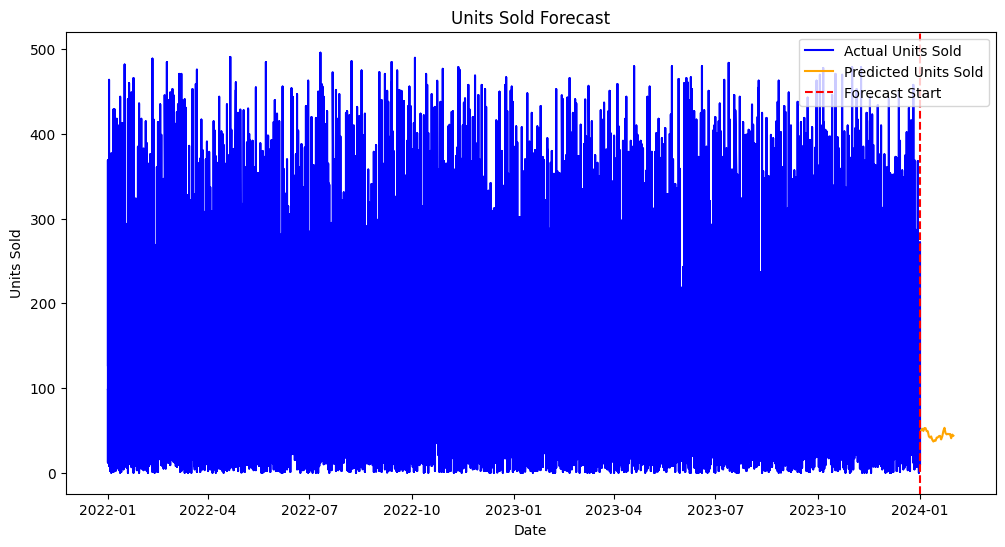

In [29]:
# Step 4: Visualize the Results
# Combine the historical data with the forecast
historical_data = data[['Date', 'Units Sold']]
historical_data = historical_data.rename(columns={'Units Sold': 'actual_units_sold'})
forecast_data = future_data[['Date', 'predicted_units_sold']]

# Merge historical and forecast data
combined_data = pd.merge(historical_data, forecast_data, on='Date', how='outer')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Date'], combined_data['actual_units_sold'], label='Actual Units Sold', color='blue')
plt.plot(combined_data['Date'], combined_data['predicted_units_sold'], label='Predicted Units Sold', color='orange')
plt.axvline(x=last_date, color='red', linestyle='--', label='Forecast Start')
plt.title('Units Sold Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()